In [1]:
import pandas as pd 
import statsmodels.api as sm 
import numpy as np

# read the data in 
df = pd.read_csv('G:\\Python excel\\logisticregressionmodelfiles\\binary.csv') 
# take a look at

In [2]:
print(df.head())

   admit  gre   gpa  prestige  gender
0      1  380  3.61         3       1
1      1  660  3.67         3       1
2      1  800  4.00         1       1
3      0  640  3.19         4       0
4      1  520  2.93         4       1


In [3]:
df.isnull().sum()

admit       0
gre         0
gpa         0
prestige    0
gender      0
dtype: int64

In [4]:
# dummify rank 
dummy_ranks = pd.get_dummies(df['prestige'],prefix='prestige',drop_first=True) 
print(dummy_ranks.head())

   prestige_2  prestige_3  prestige_4
0           0           1           0
1           0           1           0
2           0           0           0
3           0           0           1
4           0           0           1


In [5]:
#Combing two datframes
data2 = pd.concat([df,dummy_ranks], axis=1)

In [6]:
data2=data2.drop('prestige', axis=1)

In [7]:
data2.head()

,admit,gre,gpa,gender,prestige_2,prestige_3,prestige_4
0,1,380,3.61,1,0,1,0
1,1,660,3.67,1,0,1,0
2,1,800,4.00,1,0,0,0
3,0,640,3.19,0,0,0,1
4,1,520,2.93,1,0,0,1


In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics



In [9]:
X=data2[['gre','gpa','gender','prestige_2','prestige_3','prestige_4']]
y=data2['admit']
X_train, X_test, y_train, y_test = train_test_split(X,y , test_size=0.3,random_state=0)

In [10]:
print (X_train.shape)
print (X_test.shape)

(279, 6)
(120, 6)


In [11]:
data2.shape

(399, 7)

In [12]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

C:\Users\ramba\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [13]:
print (logreg.intercept_)
print (logreg.coef_)

[-0.06674012]
[[-0.00029238 -0.15091702  0.03152077  0.10302233 -0.1607328   0.02023518]]


In [14]:
print ("Intercept",logreg.intercept_ )#basic price is intercept


Intercept [-0.06674012]


In [15]:
#print ("Slope",logreg.coef_)
coeff=pd.concat([pd.DataFrame(X_train.columns),pd.DataFrame(logreg.coef_.T)], axis=1)
coeff.columns = ("var", "co-eff")


In [16]:
print(coeff)

          var    co-eff
0         gre -0.000292
1         gpa -0.150917
2      gender  0.031521
3  prestige_2  0.103022
4  prestige_3 -0.160733
5  prestige_4  0.020235


In [17]:
np.exp(-0.000292)

0.9997080426278507

In [18]:
coeff['odd(co-eff)'] = np.exp(coeff['co-eff'])
coeff

,var,co-eff,odd(co-eff)
0,gre,-0.000292,0.999708
1,gpa,-0.150917,0.859919
2,gender,0.031521,1.032023
3,prestige_2,0.103022,1.108516
4,prestige_3,-0.160733,0.851520
5,prestige_4,0.020235,1.020441


In [19]:
#Interpretation of coeffiecients
#If gre score increases by unit then the odds of getting an admission increses
#by 1.000854 -1 =0.000854

#If gpa score increases by unit then the odds of getting an admission increses
#by 1.289814 -1 =0.289814

In [20]:
1.108516-1

0.10851600000000006

In [21]:
#If a student's gender is male then the odds of getting an admission decreases by 6% (0.941415-1 = -0.058585)
#When compared female.

In [22]:
#Add train data prediction
train_pred = pd.DataFrame(logreg.predict(X_train))
train_pred.columns = ['Pred_results']
train_pred.head()

,Pred_results
0,0
1,0
2,0
3,0
4,0


In [23]:
y_train=y_train.reset_index(drop=True)

In [24]:
pd.concat([y_train,train_pred],axis = 1).head()

,admit,Pred_results
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0


In [25]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_train,train_pred)) 

[[189   0]
 [ 90   0]]


In [26]:
#Add train data prediction
train_pred_prob = pd.DataFrame(logreg.predict_proba(X_train))
train_pred_prob.columns = ['Noadmit','Admit']
train_pred_prob.head()

,Noadmit,Admit
0,0.680198,0.319802
1,0.721827,0.278173
2,0.690373,0.309627
3,0.634925,0.365075
4,0.701594,0.298406


In [27]:
train_pred_class = np.where(train_pred_prob['Admit']>0.3,1,0)
#Confusion Matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_train,train_pred_class)) 

[[ 43 146]
 [ 22  68]]


In [28]:
a = (confusion_matrix(y_train, train_pred_class)) 
TP = a[1,1]
TN = a[0,0]
print ("TP is {}".format(TP))
print ("TN is {}".format(TN))
print ('Overall accuracy')
(TP+TN)/(a[1,1]+a[0,0]+a[1,0]+a[0,1])

TP is 68
TN is 43
Overall accuracy


0.3978494623655914

In [29]:
#Add train data prediction
test_pred = pd.DataFrame(logreg.predict(X_test))
test_pred.columns = ['test_pred']

In [30]:
y_test=y_test.reset_index(drop=True)

In [31]:
pd.concat([y_test,test_pred],axis = 1)

,admit,test_pred
0,0,0
1,0,0
2,1,0
3,1,0
4,0,0
5,0,0
6,0,0
7,1,0
8,0,0
9,1,0


In [32]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, test_pred))

[[83  0]
 [37  0]]


In [33]:
from sklearn.metrics import classification_report
print(classification_report(y_test, test_pred))

              precision    recall  f1-score   support

           0       0.69      1.00      0.82        83
           1       0.00      0.00      0.00        37

    accuracy                           0.69       120
   macro avg       0.35      0.50      0.41       120
weighted avg       0.48      0.69      0.57       120



C:\Users\ramba\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ramba\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ramba\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [34]:
test_pred_prob = pd.DataFrame(logreg.predict_proba(X_test))
test_pred_prob.columns = ['Noadmit','Admit']
test_pred_prob.head()

,Noadmit,Admit
0,0.656203,0.343797
1,0.684458,0.315542
2,0.706778,0.293222
3,0.707601,0.292399
4,0.653641,0.346359


In [35]:
#Confusion matrix using threshold values
test_pred_class = pd.DataFrame(np.where(test_pred_prob['Admit']>0.5,1,0))
test_pred_class.columns = ['test_pred']
print(confusion_matrix(y_test, test_pred_class)) 

[[83  0]
 [37  0]]


In [36]:
a = (confusion_matrix(y_test, test_pred_class)) 
TP = a[1,1]
TN = a[0,0]
print ('Overall accuracy')
(TP+TN)/(a[1,1]+a[0,0]+a[1,0]+a[0,1])

Overall accuracy


0.6916666666666667

### The precision is the ratio tp / (tp + fp) where tp is the number of true positives and fp the number of false positives.
##The precision is intuitively the ability of the classifier to not label a sample as positive if it is negative.

### The recall is the ratio tp / (tp + fn) where tp is the number of true positives and fn the number of false negatives.
###The recall is intuitively the ability of the classifier to find all the positive samples.

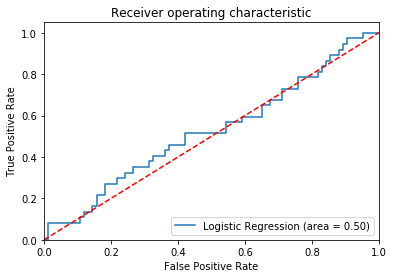

In [37]:
import matplotlib.pyplot as plt 

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

NUMERIC VARIABLES
For every one unit increase in gpa, the odds of being admitted increases by a factor of 2.235; for every one unit increase in gre score, the odds of being admitted increases by a factor of 1.002.

CATEGORICAL VARIABLES
Still interpreting the results in comparison to the group that was dropped. Applicants from a Rank 2 University compared to a Rank 1 University are 0.509 as likely to be admitted; applicants from a Rank 3 University compared to a Rank 1 University are 0.262 as likely to be admitted, etc.
Applicants from a Rank 2 University are about half as likely to be admitted compared to applicants from a Rank 1 University, and applicants from a Rank 3 University are about a quarter as likely to be admitted compared to applicants from a Rank 1 University.
When interpreting odd ratios, any value greater than 1 indicates an increase in the odds, i.e. an increase in the likely hood, of that group being in the outcome variable, and any value less than 1 indicates a decrease in the odds, i.e. an decrease in the likely hood.